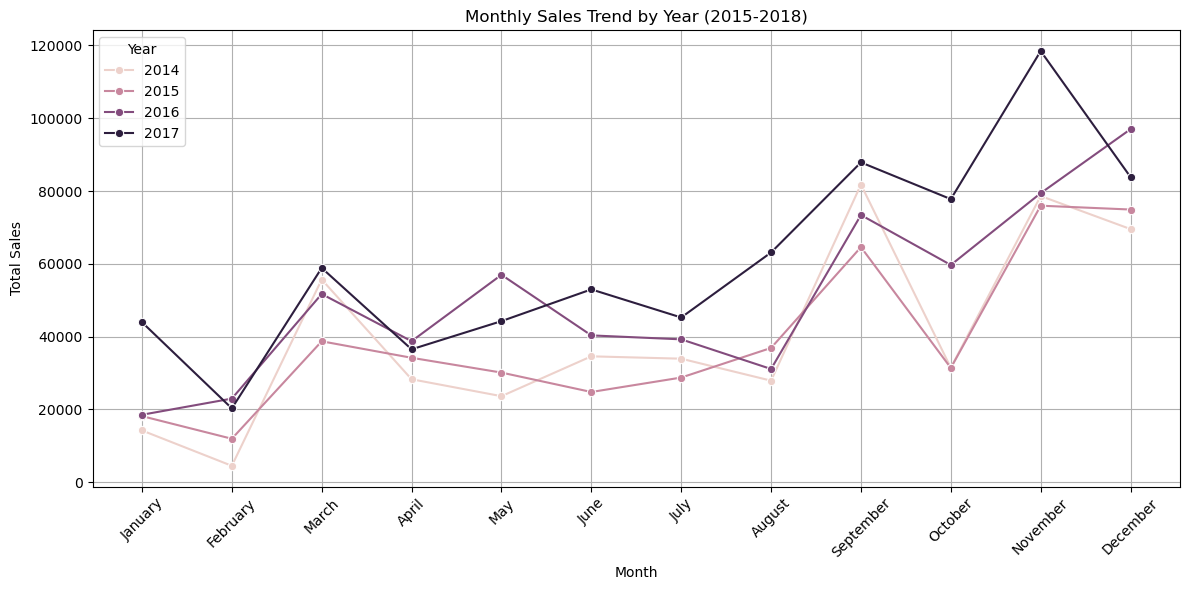

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_excel("/Users/macintoshhd/Desktop/Python-test/Dataset1.xlsx")


df['Order Date'] = pd.to_datetime(df['Order Date'])

df['Year'] = df['Order Date'].dt.year
df['Month'] = df['Order Date'].dt.month

sales_trend = df.groupby(['Year', 'Month'])['Sales'].sum().reset_index()

sales_trend['Month'] = sales_trend['Month'].apply(lambda x: pd.to_datetime(f"{x:02d}", format='%m').strftime('%B'))

plt.figure(figsize=(12, 6))
sns.lineplot(data=sales_trend, x='Month', y='Sales', hue='Year', marker='o')

plt.title('Monthly Sales Trend by Year (2015-2018)')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.legend(title='Year')
plt.grid()
plt.tight_layout()
plt.show()

In [4]:
region_sales = df.groupby('Region')['Order ID'].count()
region_sales.loc['Total'] = region_sales.sum()
print(region_sales)


Region
Central    2323
East       2848
South      1620
West       3203
Total      9994
Name: Order ID, dtype: int64


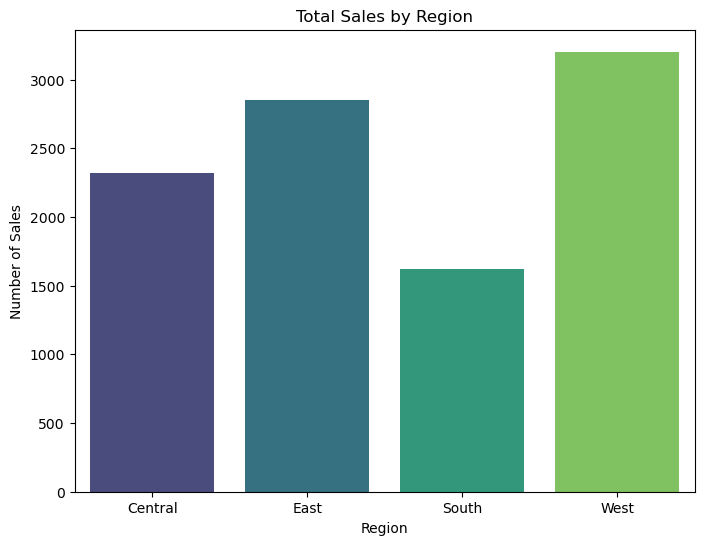

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


region_sales_df = pd.DataFrame({
    'Region': region_sales.index[:-1],
    'Sales': region_sales[:-1]
})


plt.figure(figsize=(8,6))
sns.barplot(data=region_sales_df, x='Region', y='Sales', palette="viridis", hue='Region', dodge=False)
plt.title('Total Sales by Region')
plt.xlabel('Region')
plt.ylabel('Number of Sales')
plt.show()


In [6]:
df['Profit Margin'] = (df['Profit'] / df['Sales']) * 100
highest_margin = df.loc[df['Profit Margin'].idxmax()]
lowest_margin = df.loc[df['Profit Margin'].idxmin()]

print("Highest Profit Margin Product:")
print(highest_margin[['Product Name', 'Profit Margin', 'Sales', 'Profit']])

print("\nLowest Profit Margin Product:")
print(lowest_margin[['Product Name', 'Profit Margin', 'Sales', 'Profit']])


Highest Profit Margin Product:
Product Name     Prang Dustless Chalk Sticks
Profit Margin                           50.0
Sales                                   1.68
Profit                                  0.84
Name: 61, dtype: object

Lowest Profit Margin Product:
Product Name     Eureka Disposable Bags for Sanitaire Vibra Gro...
Profit Margin                                               -275.0
Sales                                                        1.624
Profit                                                      -4.466
Name: 261, dtype: object


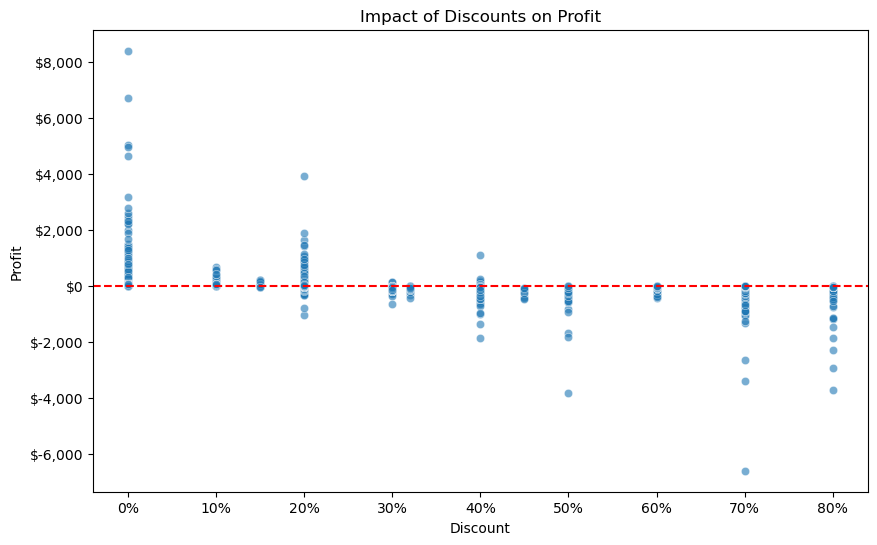

In [18]:
import matplotlib.ticker as mtick

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Discount', y='Profit', alpha=0.6)
plt.title('Impact of Discounts on Profit')
plt.xlabel('Discount')
plt.ylabel('Profit')
plt.axhline(0, color='red', linestyle='--')  


plt.gca().xaxis.set_major_formatter(mtick.PercentFormatter(xmax=1))


plt.gca().yaxis.set_major_formatter(mtick.StrMethodFormatter('${x:,.0f}'))

plt.show()


In [8]:
customer_summary = df.groupby('Customer ID').agg({
    'Sales': 'sum',
    'Profit': 'sum'
}).reset_index()

top_customers = customer_summary.sort_values(by='Profit', ascending=False)
pd.options.display.float_format = '{:,.2f}'.format


top_customers.head(10)




,Customer ID,Sales,Profit
741,TC-20980,"19,052.22","8,981.32"
621,RB-19360,"15,117.34","6,976.10"
669,SC-20095,"14,142.33","5,757.41"
327,HL-15040,"12,873.30","5,622.43"
6,AB-10105,"14,473.57","5,444.81"
730,TA-21385,"14,595.62","4,703.79"
160,CM-12385,"8,954.02","3,899.89"
424,KD-16495,"8,181.26","3,038.63"
48,AR-10540,"6,608.45","2,884.62"
234,DR-12940,"8,350.87","2,869.08"


In [9]:
import pandas as pd
import datetime as dt


df['Order Date'] = pd.to_datetime(df['Order Date'])

reference_date = df['Order Date'].max() + dt.timedelta(days=1)

rfm = df.groupby('Customer ID').agg({
    'Order Date': lambda x: (reference_date - x.max()).days,
    'Order ID': 'count',
    'Sales': 'sum'
}).reset_index()

rfm.columns = ['Customer ID', 'Recency', 'Frequency', 'Monetary']

rfm['R_Score'] = pd.qcut(rfm['Recency'], 5, labels=[5, 4, 3, 2, 1])
rfm['F_Score'] = pd.qcut(rfm['Frequency'], 5, labels=[1, 2, 3, 4, 5])
rfm['M_Score'] = pd.qcut(rfm['Monetary'], 5, labels=[1, 2, 3, 4, 5])

rfm['RFM_Segment'] = rfm['R_Score'].astype(str) + rfm['F_Score'].astype(str) + rfm['M_Score'].astype(str)
rfm['RFM_Score'] = rfm[['R_Score', 'F_Score', 'M_Score']].sum(axis=1)

def segment_customers(rfm):
    if rfm['RFM_Score'] >= 9:
        return 'Best Customers'
    elif rfm['RFM_Score'] >= 6:
        return 'Loyal Customers'
    elif rfm['RFM_Score'] >= 4:
        return 'Potential Loyalists'
    else:
        return 'At Risk'

rfm['Customer Segment'] = rfm.apply(segment_customers, axis=1)

rfm.head()


,Customer ID,Recency,Frequency,Monetary,R_Score,F_Score,M_Score,RFM_Segment,RFM_Score,Customer Segment
0,AA-10315,185,11,"5,563.56",2,3,5,235,10,Best Customers
1,AA-10375,20,15,"1,056.39",5,4,2,542,11,Best Customers
2,AA-10480,260,12,"1,790.51",1,3,3,133,7,Loyal Customers
3,AA-10645,56,18,"5,086.93",3,4,5,345,12,Best Customers
4,AB-10015,416,6,886.16,1,1,1,111,3,At Risk
